In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")
df.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

#### Data Cleaning

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.shape

(1338, 7)

<Axes: xlabel='sex', ylabel='age'>

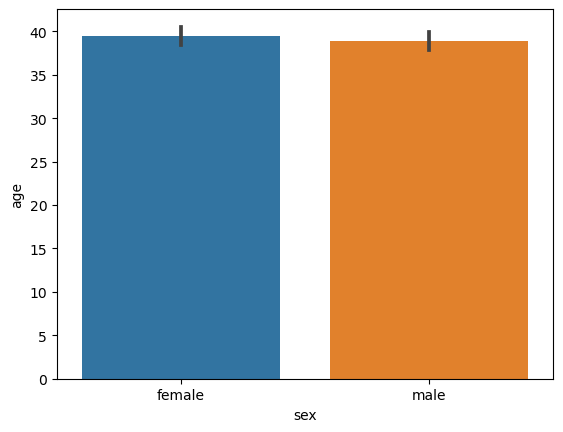

In [6]:
sns.barplot(x="sex",y="age",data = df)

<Axes: xlabel='sex', ylabel='bmi'>

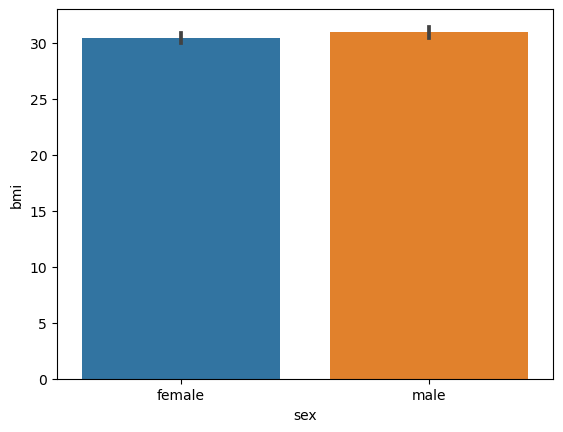

In [7]:
sns.barplot(x="sex",y="bmi",data = df)

<Axes: xlabel='region', ylabel='age'>

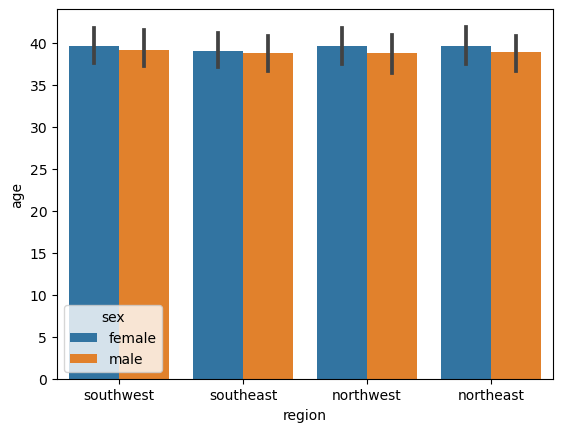

In [8]:
sns.barplot(x="region",y="age",hue ="sex",data = df)

<Axes: xlabel='region', ylabel='charges'>

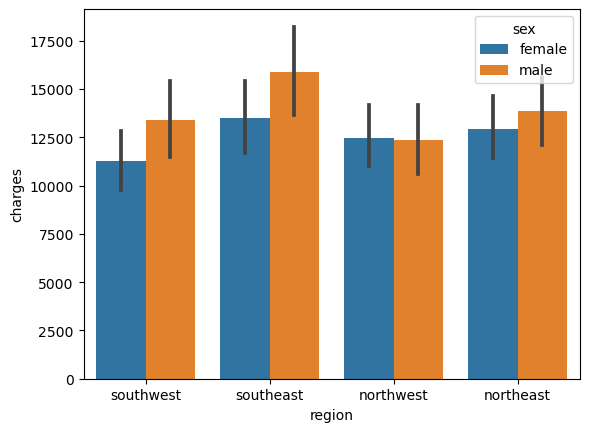

In [9]:
sns.barplot(x="region",y="charges",hue ="sex",data = df)

<Axes: xlabel='smoker', ylabel='count'>

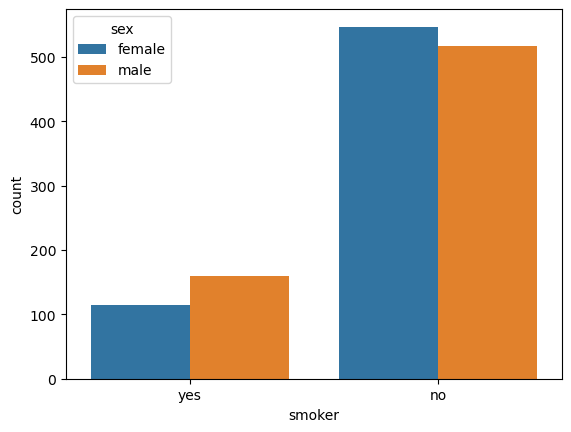

In [10]:
sns.countplot(data=df,x="smoker",hue="sex")

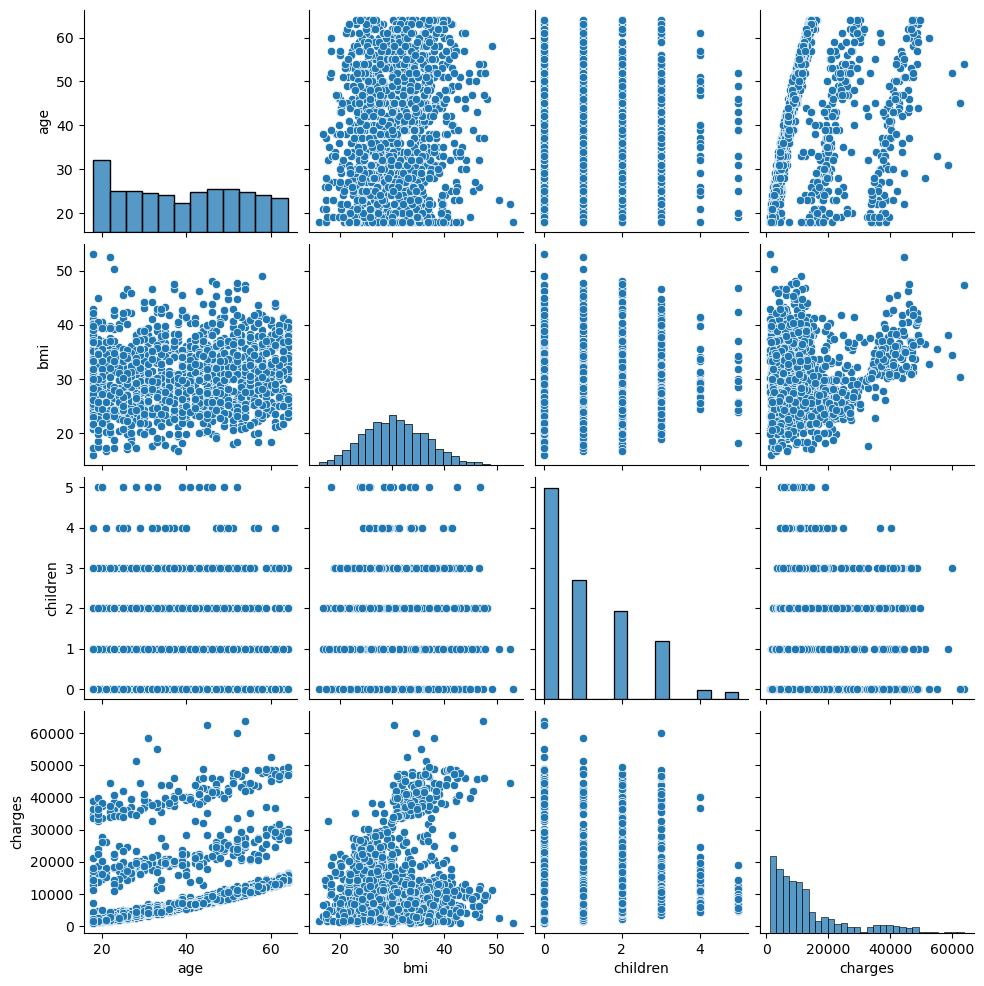

In [11]:
sns.pairplot(df[["age","bmi","children","charges"]])

### Data Preprocessing

In [12]:
import sklearn

In [13]:
#identifying the inputs
y = df["charges"]
X = df[["age","sex","bmi","children","smoker","region"]]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [15]:
X_train.head(5)

age     sex     bmi  children smoker     region
621    37    male  34.100         4    yes  southwest
194    18    male  34.430         0     no  southeast
240    23  female  36.670         2    yes  northeast
1168   32    male  35.200         2     no  southwest
1192   58  female  32.395         1     no  northeast

In [16]:
print(X_train.shape,y_train.shape)

(1070, 6) (1070,)


In [17]:
print(X_test.shape,y_test.shape)

(268, 6) (268,)


In [18]:
X_test.head(5)

age     sex     bmi  children smoker     region
578    52    male  30.200         1     no  southwest
610    47  female  29.370         1     no  southeast
569    48    male  40.565         2    yes  northwest
1034   61    male  38.380         0     no  northwest
198    51  female  18.050         0     no  northwest

#### Separating the categorical and numerical values

In [19]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [20]:
X_train_cat = X_train.select_dtypes(include=['object'])

In [21]:
X_train_cat.head(2)

sex smoker     region
621  male    yes  southwest
194  male     no  southeast

In [22]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])

In [23]:
X_train_num.head(2)

age    bmi  children
621   37  34.10         4
194   18  34.43         0

In [24]:
X_test.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [25]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head(2)

sex smoker     region
578    male     no  southwest
610  female     no  southeast

In [26]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head(2)

age    bmi  children
578   52  30.20         1
610   47  29.37         1

## Scaling the Numerical 

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescale = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns,index = X_train_num.index)
X_train_rescale.head(2)

age       bmi  children
621 -0.148533  0.545305  2.413948
194 -1.497808  0.598672 -0.892195

In [28]:
X_test_rescale = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)
X_test_rescale.head(2)

age       bmi  children
578  0.916684 -0.085396 -0.065659
610  0.561612 -0.219622 -0.065659

### One Hot Encoding for Categorical

In [29]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(drop='first', sparse=False)
X_train_cat_ohe = pd.DataFrame(encode.fit_transform(X_train_cat),columns = encode.get_feature_names_out(X_train_cat.columns),index = X_train_cat.index)
X_train_cat_ohe.head()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


sex_male  smoker_yes  region_northwest  region_southeast  \
621        1.0         1.0               0.0               0.0   
194        1.0         0.0               0.0               1.0   
240        0.0         1.0               0.0               0.0   
1168       1.0         0.0               0.0               0.0   
1192       0.0         0.0               0.0               0.0   

      region_southwest  
621                1.0  
194                0.0  
240                0.0  
1168               1.0  
1192               0.0

In [30]:
X_test_cat_ohe = pd.DataFrame(encode.transform(X_test_cat),columns = encode.get_feature_names_out(X_test_cat.columns),index = X_test_cat.index)
X_test_cat_ohe.head()

sex_male  smoker_yes  region_northwest  region_southeast  \
578        1.0         0.0               0.0               0.0   
610        0.0         0.0               0.0               1.0   
569        1.0         1.0               1.0               0.0   
1034       1.0         0.0               1.0               0.0   
198        0.0         0.0               1.0               0.0   

      region_southwest  
578                1.0  
610                0.0  
569                0.0  
1034               0.0  
198                0.0

### Concate the Encoded Categorical Features and Rescaled Numerical Features:


In [31]:
X_train_transformed = pd.concat([X_train_rescale,X_train_cat_ohe],axis=1)
X_train_transformed.head(2)

age       bmi  children  sex_male  smoker_yes  region_northwest  \
621 -0.148533  0.545305  2.413948       1.0         1.0               0.0   
194 -1.497808  0.598672 -0.892195       1.0         0.0               0.0   

     region_southeast  region_southwest  
621               0.0               1.0  
194               1.0               0.0

In [32]:
X_test_transformed = pd.concat([X_test_rescale,X_test_cat_ohe],axis=1)
X_test_transformed.head(2)

age       bmi  children  sex_male  smoker_yes  region_northwest  \
578  0.916684 -0.085396 -0.065659       1.0         0.0               0.0   
610  0.561612 -0.219622 -0.065659       0.0         0.0               0.0   

     region_southeast  region_southwest  
578               0.0               1.0  
610               1.0               0.0

### Building a model

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

LinearRegression()

In [34]:
y_test_predict_1 = lr.predict(X_test_transformed)

In [35]:
final_df = pd.DataFrame([y_test,y_test_predict_1])

In [36]:
final_df

578        610          569         1034         198   \
charges    9724.53  8547.6913  45702.02235  12950.0712  9644.252500   
Unnamed 0      NaN        NaN          NaN         NaN  8002.371974   

                 981           31           1256       1219        1320  ...  \
charges    4500.33925   2198.189850  11436.73815  7537.1639  5425.02335  ...   
Unnamed 0         NaN  40074.950944          NaN        NaN         NaN  ...   

                 884        326        1109       783          668   \
charges    4877.98105  3561.8889  8605.3615  24520.264  45710.20785   
Unnamed 0         NaN        NaN        NaN        NaN          NaN   

                  1084        726          1132        725         963   
charges    15019.76005  6664.68595  20709.02034  40932.4295  9500.57305  
Unnamed 0          NaN         NaN          NaN         NaN         NaN  

[2 rows x 268 columns]

<Axes: xlabel='charges', ylabel='Count'>

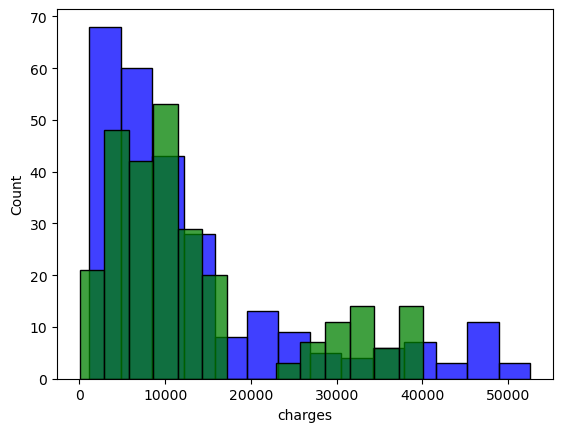

In [37]:
sns.histplot(y_test,color='blue')
sns.histplot(y_test_predict_1,color ="green")

In [38]:
from sklearn import metrics
print("Mean Absolute Error :" ,metrics.mean_absolute_error(y_test,y_test_predict_1))
print("Mean Squared Error :" ,metrics.mean_squared_error(y_test,y_test_predict_1))
print("Root Mean Squared Error :" ,np.sqrt(metrics.mean_absolute_error(y_test,y_test_predict_1)))

Mean Absolute Error : 3933.272649405239
Mean Squared Error : 31827950.22952383
Root Mean Squared Error : 62.71580860839824


In [39]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed,y_train)

KNeighborsRegressor()

In [40]:
y_test_predict_2 = regressor.predict(X_test_transformed)

<Axes: xlabel='charges', ylabel='Count'>

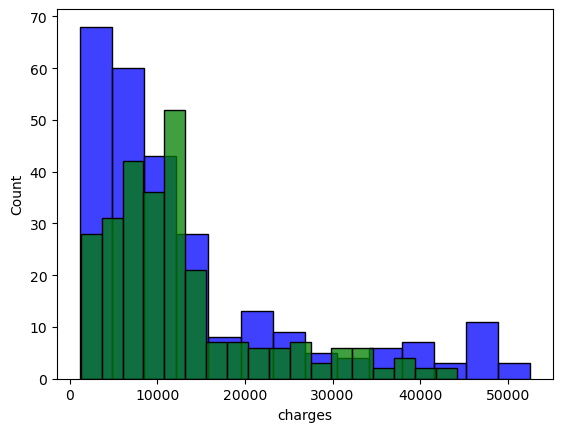

In [41]:
sns.histplot(y_test,color='blue')
sns.histplot(y_test_predict_2,color ="green")

In [42]:
from sklearn import metrics
print("Mean Absolute Error :" ,metrics.mean_absolute_error(y_test,y_test_predict_2))
print("Mean Squared Error :" ,metrics.mean_squared_error(y_test,y_test_predict_2))
print("Root Mean Squared Error :" ,np.sqrt(metrics.mean_absolute_error(y_test,y_test_predict_2)))

Mean Absolute Error : 4013.756723727612
Mean Squared Error : 42733048.52240992
Root Mean Squared Error : 63.35421630584354


In [43]:
from sklearn.tree import DecisionTreeRegressor
regres = DecisionTreeRegressor()
regres.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [44]:
y_test_predict_3 = regres.predict(X_test_transformed)

<Axes: xlabel='charges', ylabel='Count'>

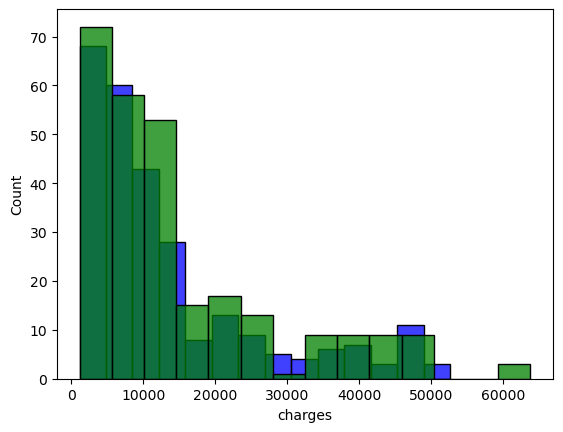

In [45]:
sns.histplot(y_test,color='blue')
sns.histplot(y_test_predict_3,color ="green")

In [46]:
from sklearn import metrics
print("Mean Absolute Error :" ,metrics.mean_absolute_error(y_test,y_test_predict_3))
print("Mean Squared Error :" ,metrics.mean_squared_error(y_test,y_test_predict_3))
print("Root Mean Squared Error :" ,np.sqrt(metrics.mean_absolute_error(y_test,y_test_predict_3)))

Mean Absolute Error : 3341.6178981305975
Mean Squared Error : 50300816.76019133
Root Mean Squared Error : 57.80672883091204


In [47]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_transformed,y_train)

SVR()

In [48]:
y_test_predict_4 = svr.predict(X_test_transformed)

<Axes: xlabel='charges', ylabel='Count'>

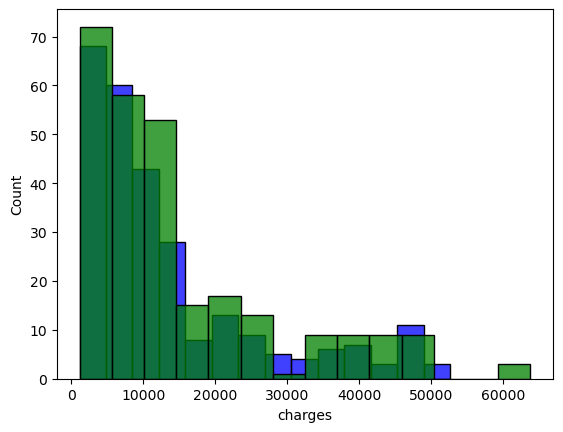

In [49]:
sns.histplot(y_test,color='blue')
sns.histplot(y_test_predict_3,color ="green")

In [50]:
from sklearn import metrics
print("Mean Absolute Error :" ,metrics.mean_absolute_error(y_test,y_test_predict_4))
print("Mean Squared Error :" ,metrics.mean_squared_error(y_test,y_test_predict_4))
print("Root Mean Squared Error :" ,np.sqrt(metrics.mean_absolute_error(y_test,y_test_predict_4)))

Mean Absolute Error : 8581.532463616137
Mean Squared Error : 175539287.1028644
Root Mean Squared Error : 92.6365611603547


In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [52]:
y_test_predict_5 = rfr.predict(X_test_transformed)

<Axes: xlabel='charges', ylabel='Count'>

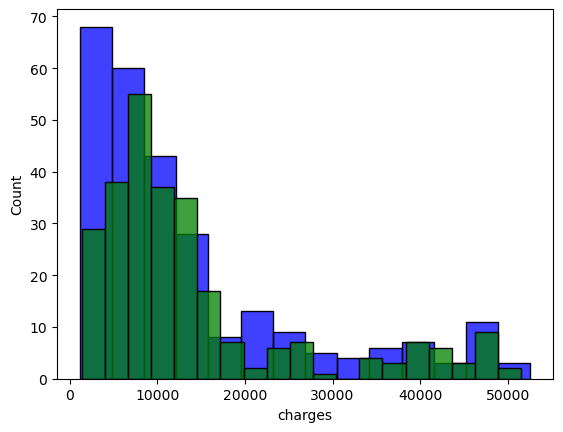

In [53]:
sns.histplot(y_test,color='blue')
sns.histplot(y_test_predict_5,color ="green")

In [54]:
from sklearn import metrics
print("Mean Absolute Error :" ,metrics.mean_absolute_error(y_test,y_test_predict_5))
print("Mean Squared Error :" ,metrics.mean_squared_error(y_test,y_test_predict_5))
print("Root Mean Squared Error :" ,np.sqrt(metrics.mean_absolute_error(y_test,y_test_predict_5)))

Mean Absolute Error : 2567.210868549409
Mean Squared Error : 18565442.06869312
Root Mean Squared Error : 50.66765110550724


## The Least error noticed in ensemble rfr with 2533.54
### Hence RFR is the best algo for this Insurance prediction